# Exercise 4.9 - Part 2

## Table of Contents:

#### 01. Importing libraries and Data
#### 02. Visualizations 

## 01. Importing Libraries and Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data

path = r'C:\Users\Rebecca\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Rebecca\\Instacart Basket Analysis'

In [4]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_cust_merge.pkl'))

Reviewing data:

In [5]:
ords_prods_cust_merge.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,last_name,gender,state,age,date_joined,dependants,family_status,income,True
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,2398795,1,2,3,7,15.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,2398795,1,2,3,7,15.0,10258,2,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,2398795,1,2,3,7,15.0,12427,3,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2398795,1,2,3,7,15.0,13176,4,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2398795,1,2,3,7,15.0,26088,5,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'source', 'price_range_loc', 'busiest_day',
       'busiest_days_breakdown', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend_price', 'spender_type',
       'average_days_since_last_order', 'order_frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'family_status', 'income', 'True'],
      dtype='object')

## 02. Visualizations 

QUESTION 3 CHART - 

order_hour_of_day histogram

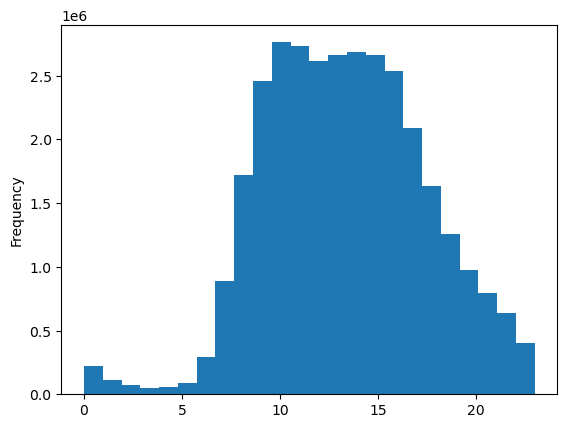

In [7]:
# Create histogram

hist = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

In [8]:
ords_prods_cust_merge['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

Chart review: 

The histogram above is showing us the frequency of orders by hour during a 24 hour day. By looking at the histogram, we can see that most orders come through during the 11:00 to 15:00 hours of the day. 
Instacart can expect to be busiest during those timeframes and least busy during the hours of 0:00 to 5:00. This histogram is only slightly negatively skewed.

QUESTION 4 CHART - 

loyalty_flag bar chart

<Axes: xlabel='loyalty_flag'>

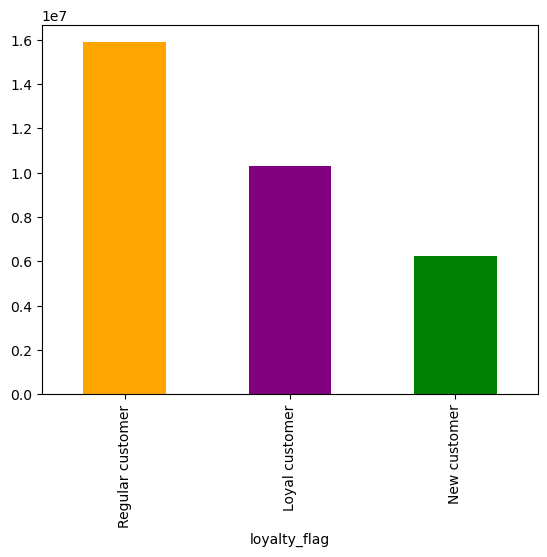

In [9]:
# Create bar chart

ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color = ['orange', 'purple', 'green'])

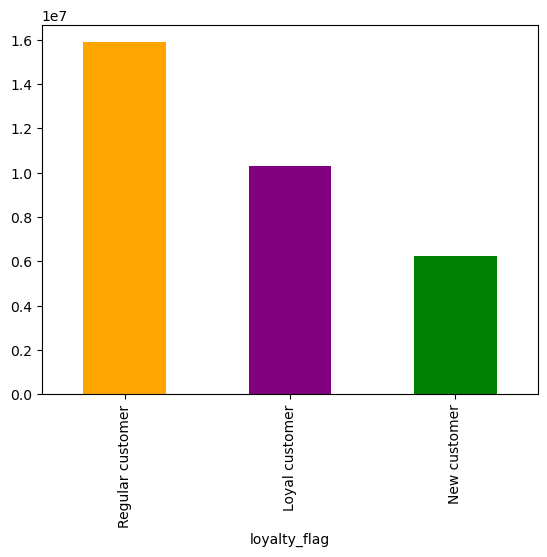

In [10]:
bar = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color = ['orange', 'purple', 'green'])

Exporting visualizations

In [11]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [12]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

QUESTION 5 CHART - 

prices and hour of day line chart

In [13]:
# Creating sample of data 

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [14]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [16]:
# Store 70% of sample 

big = ords_prods_cust_merge[dev]

In [17]:
# Store 30% of sample

small = ords_prods_cust_merge[~dev]

In [18]:
len(ords_prods_cust_merge)

32404859

In [19]:
len(big) + len(small)

32404859

In [20]:
df_2 = small[['order_hour_of_day','prices']]

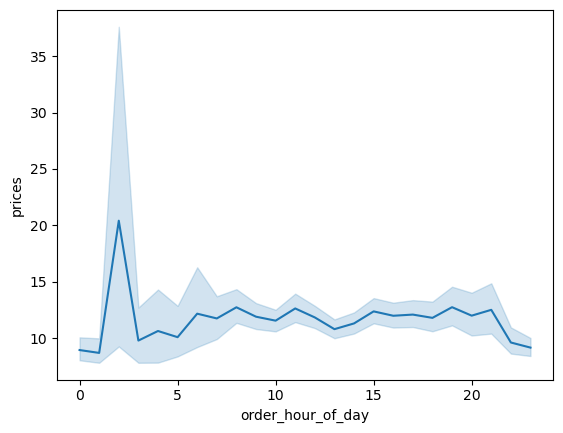

In [21]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

Chart review: 

Based on the chart, higher priced items are purchased between 1:00 - 3:00, with steady purchase prices made throughout the remainder of the day. 

In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int8   
 1   prices             float32
dtypes: float32(1), int8(1)
memory usage: 120.5 MB


In [23]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hour_of_day.png'))

QUESTION 6 CHART - 

age and dependants line chart

In [24]:
# Creating another small data set

df_3 = small[['dependants','age']]

In [25]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column      Dtype
---  ------      -----
 0   dependants  int32
 1   age         int32
dtypes: int32(2)
memory usage: 148.3 MB


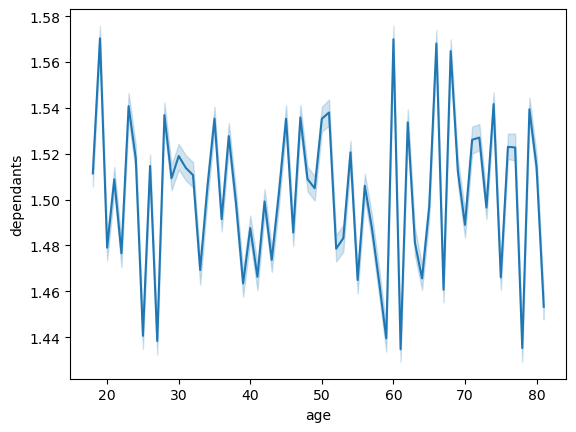

In [27]:
line2 = sns.lineplot(data = df_3, x = 'age',y = 'dependants')

Chart review: 

There is no connection between dependants and age, as there is no overall direction of the chart and the lines show inconsistency. There is no discernible pattern within the chart. 

In [28]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line2_dependants_age.png'))

QUESTION 7 CHART - 

age and income scatterplot

<Axes: xlabel='age', ylabel='income'>

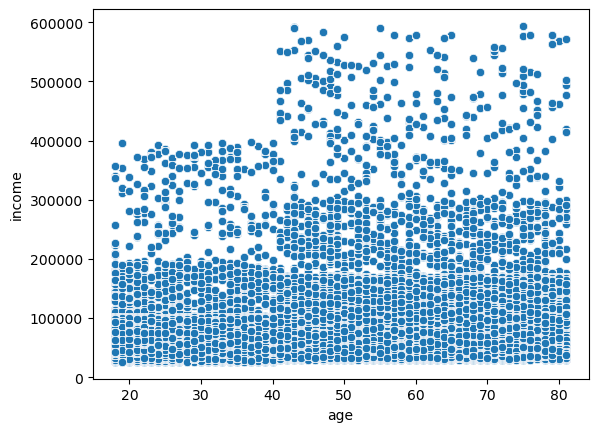

In [33]:
# Creating scatterplot

sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust_merge)

Chart review:

I don't think it's any surprise that the older you get, the more money you make, so this scatterplot's positive correlation is not surprising. When looking at the income distribution, it's not surprising to see so much clustering at the bottom 100,000 - 200,000, which then increases as age increases. 

I am surprised by two things: One, that 20 year olds are making 100,000 - 200,000 and, in some cases, more (I certainly was NOT making that amount of money at that age), which means I would need to research what a typical salary is. Is this correct? How many 20 - 30 year olds do we have in the data set? Are their jobs typical jobs (then, what ARE typical jobs?), or are more lucrative job holders in their 20s - 30s more likely to use InstaCart than other 20 - 30 year olds? The second thing I'm surprised by is the sharp increase of income between 40 and 41. I would expect more of a slower rise in income, but this looks more like a ledge, with a sharp increase. A bit more research would also need to be done here, to make verify the data.